# Temperature effect on kinematic viscosity of gas and liquid

### 1) Computing viscosity and density with Cantera 

#### Case A) Gas properties

import all modules required 

In [100]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

create "Cantera" gas object. when initializing, gas object contains only H2. Since for the purpose of this study the gas composition is arbitrary, the composition is not change

In [101]:
gas = ct.Solution('gri30.cti', 'gri30_mix')

gas variables are defined:<br>
p is left constant at ambient pressure<br>
T as a vector, gas properties are computed at specified values in T_range

In [102]:
p   = 101325 # ambient pressure in (Pa)
T_range = [273.15+r for r in range(0,500,50)]  # temperature range in (K)

function is defined which takes temperature T as an input and returns density, dynamic viscosity and kinematic viscosity at given temperature T and pressure P

In [103]:
def gasProperty(T):
    # define gas 
    gas.TP = T,p  # set gas to temperature T and pressure P
    return gas.density, gas.viscosity, gas.viscosity/gas.density

run function gasProperty(T) over all values in T_range

In [104]:
output = [gasProperty(T) for T in T_range]
density, dynamicViscosity, kinematicViscosity = zip(*output)

Plot output over temperature. Since only trends are compared, all data is normalized to respective maximum value 

Text(0.5, 1.0, "['gas properties']")

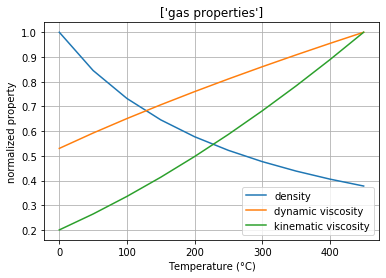

In [105]:
plt.plot(np.array(T_range)-273.15,np.divide(density, max(density)))
plt.plot(np.array(T_range)-273.15,np.divide(dynamicViscosity, max(dynamicViscosity)))
plt.plot(np.array(T_range)-273.15,np.divide(kinematicViscosity, max(kinematicViscosity)))
plt.legend(['density','dynamic viscosity','kinematic viscosity'])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('normalized property')
plt.title(['gas properties'])

As can be seen: density decreases with 1/T, while dynamic viscosity increases with increasing T. Kinematic viscosity follows trend of dynamic viscosity.



#### Case B) Liquid properties

Now we repeat the same thing with water representing a liquid:

In [106]:
water = ct.Water()

In [107]:
def waterProperty(T):
    # define gas 
    water.TP = T,p
    return water.density, water.viscosity, water.viscosity/water.density

In [108]:
water_T_range = [273.15+r for r in range(1,99,2)]
output = [waterProperty(T) for T in water_T_range]
water_density, water_dynamicViscosity, water_kinematicViscosity = zip(*output)

Text(0.5, 1.0, 'liquid properties')

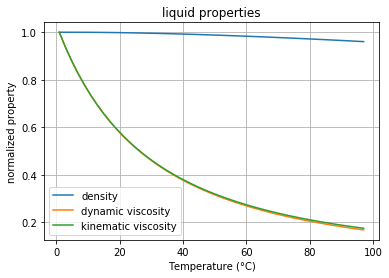

In [109]:
plt.plot(np.array(water_T_range)-273.15,np.divide(water_density, max(water_density)))
plt.plot(np.array(water_T_range)-273.15,np.divide(water_dynamicViscosity, max(water_dynamicViscosity)))
plt.plot(np.array(water_T_range)-273.15,np.divide(water_kinematicViscosity, max(water_kinematicViscosity)))
plt.legend(['density','dynamic viscosity','kinematic viscosity'])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('normalized property')
plt.title('liquid properties')

For a liquid, density remains more or less constant over T. Hence, assumption of incompressible fluid is reasonable.
However, dynamic viscosity is strongly dependent on temperature. Since density is relatively unaffected by temperature, the kinematic viscosity follows trend of dynamic viscosity.

### 2) Computing viscosity with Sutherland's law and density with ideal gas equation

Dynamic gas viscosity can be computed via Sutherland's law (e.g. for H2, https://de.wikipedia.org/wiki/Sutherland-Modell):

Text(0.5, 1.0, 'gas properties')

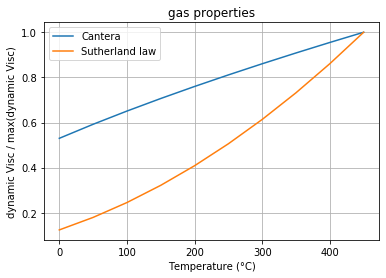

In [137]:
mu_0 = 8.76
C = 72
T_0 = 293.85
H2dynVisc = [mu_0*(T_0+C)/(T+C)*(T/T_0)**3/2 for T in T_range]
plt.plot(np.array(T_range)-273.15,np.divide(dynamicViscosity, max(dynamicViscosity)))
plt.plot(np.array(T_range)-273.15,np.divide(H2dynVisc, max(H2dynVisc)))
plt.legend(['Cantera','Sutherland law'])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('dynamic Visc / max(dynamic Visc)')
plt.title('gas properties')


In [132]:
R_S_H2 = 4124   # specific gas constant H2
density_H2 = [p/R_S_H2/T for T in T_range] #executing ideal gas equation for every temperature in T_range

In [135]:
H2kinVisc = np.divide(H2dynVisc, density_H2)

Text(0.5, 1.0, "['gas properties']")

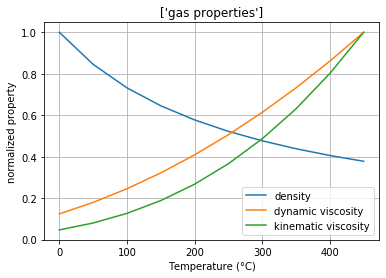

In [136]:
plt.plot(np.array(T_range)-273.15,np.divide(density_H2, max(density_H2)))
plt.plot(np.array(T_range)-273.15,np.divide(H2dynVisc, max(H2dynVisc)))
plt.plot(np.array(T_range)-273.15,np.divide(H2kinVisc, max(H2kinVisc)))
plt.legend(['density','dynamic viscosity','kinematic viscosity'])
plt.grid()
plt.xlabel('Temperature (°C)')
plt.ylabel('normalized property')
plt.title(['gas properties'])

In [143]:
%load_ext watermark
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.34.0

wget         : not installed
pandas       : 1.0.1
numpy        : 1.18.1
geopy        : not installed
altair       : not installed
vega         : not installed
vega_datasets: not installed
watermark    : 2.3.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit

 
Last updated: Fri Apr 28 2023 17:55:17Mitteleuropäische Sommerzeit

